In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import seaborn as sns

/tmp/ipykernel_7075/4090892198.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [53]:
iris=sns.load_dataset('iris')
iris
data=iris.drop(columns=['species']).values
data=torch.tensor(data).float()
iris.species.unique()
labels=torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
data, labels, test_size=0.3, random_state=42)
train_data=TensorDataset(X_train,y_train)
test_data=TensorDataset(X_test,y_test)
batchsize=32
train_loader=DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])




In [55]:
def createANNmodel(L2lambda):
    ANNiris=nn.Sequential(nn.Linear(4,64),
                         nn.ReLU(),
                         nn.Linear(64,64),
                         nn.ReLU(),

                         nn.Linear(64,3),   
                         )
    lossfun=nn.CrossEntropyLoss()
    optimizer=torch.optim.Adam(ANNiris.parameters(),lr=0.001,weight_decay=L2lambda)
    return ANNiris,lossfun,optimizer

In [56]:
numepoches=500
def trainTheModel(ANNiris,lossfun,optimizer):
    trainAcc=[]
    testAcc=[]
    losses=[]
    
    for epochi in range(numepoches):
    
        batchAcc=[]
        batchLoss=[]
        for X,y in train_loader:
            yHat=ANNiris(X)
            loss=lossfun(yHat,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())
            batchLoss.append(loss.item())
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))
        
        ANNiris.eval()
        X,y=next(iter(test_loader))
        predlabels=torch.argmax(ANNiris(X),axis=1)
        testAcc.append(100*torch.mean((predlabels==y).float()).item())
        ANNiris.train()
    return trainAcc,testAcc,losses    

In [57]:
 ANNiris,lossfun,optimizer=createANNmodel(0.05)

In [10]:
trainTheModel(ANNiris,lossfun,optimizer)

([56.25,
  60.416666666666664,
  54.166666666666664,
  41.666666666666664,
  55.208333333333336,
  64.58333333333333,
  64.58333333333333,
  63.541666666666664,
  66.66666666666667,
  71.875,
  68.75,
  69.79166666666667,
  67.70833333333333,
  65.625,
  66.66666666666667,
  66.66666666666667,
  70.83333333333333,
  80.20833333333333,
  91.66666666666667,
  91.66666666666667,
  91.66666666666667,
  93.75,
  87.5,
  84.375,
  91.66666666666667,
  92.70833333333333,
  92.70833333333333,
  93.75,
  96.875,
  93.75,
  91.66666666666667,
  91.66666666666667,
  93.75,
  96.875,
  95.83333333333333,
  94.79166666666667,
  92.70833333333333,
  95.83333333333333,
  97.91666666666667,
  94.79166666666667,
  93.75,
  95.83333333333333,
  95.83333333333333,
  96.875,
  95.83333333333333,
  96.875,
  94.79166666666667,
  95.83333333333333,
  97.91666666666667,
  93.75,
  95.83333333333333,
  96.875,
  97.91666666666667,
  96.875,
  93.75,
  94.79166666666667,
  96.875,
  96.875,
  97.91666666666667

In [58]:
l2lambdas=np.linspace(0,0.1,6)
numepoches=50
accuracyResultsTrain=np.zeros((numepoches,len(l2lambdas)))
accuracyResultsTest=np.zeros((numepoches,len(l2lambdas)))
for li in range(len(l2lambdas)):
    ANNiris,lossfun,optimizer=createANNmodel(li)
    trainAcc,testAcc,losses=trainTheModel(ANNiris,lossfun,optimizer)
    accuracyResultsTrain[:,li]=trainAcc[-50:]
    accuracyResultsTest[:,li]=testAcc[-50:]

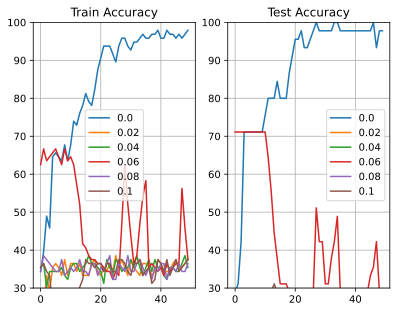

In [59]:
fig,ax=plt.subplots(1,2)
ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train Accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test Accuracy')
for i in range(2):
    ax[i].legend(leglabels)
    ax[i].set_ylim([30,100])
    ax[i].grid()

In [35]:
leglabels=[np.round(i,2) for i in l2lambdas]
leglabels

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1]